In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from plot_utils import  *
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from scipy.spatial.distance import jensenshannon as JSD 


/home/acevedo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:

 
train_set = pd.read_csv('../data/experiment_march_21/train_set.csv', header=None) .values
test_set = pd.read_csv('../data/experiment_march_21/test_set.csv', header=None) .values

train_set.shape

(70000, 100)

In [3]:
original_gan_path =  '../data/plot4'

# Histogramas de Especies

## Primero cargamos un dataset de GAN

In [4]:
early_gan_set = pd.read_csv('../data/plot4/3363_0_data/gan_samples_3363_0.csv', header=None) .values

later_gan_set = pd.read_csv('../data/plot4/64226_3_data/gan_samples_64226_3.csv', header=None) .values


## Histograma GAN (Early)-Test Set

1
1
Los datasets del histograma tienen 3363 muestras
JSD(GAN, Test Set) = 0.27441973463607594


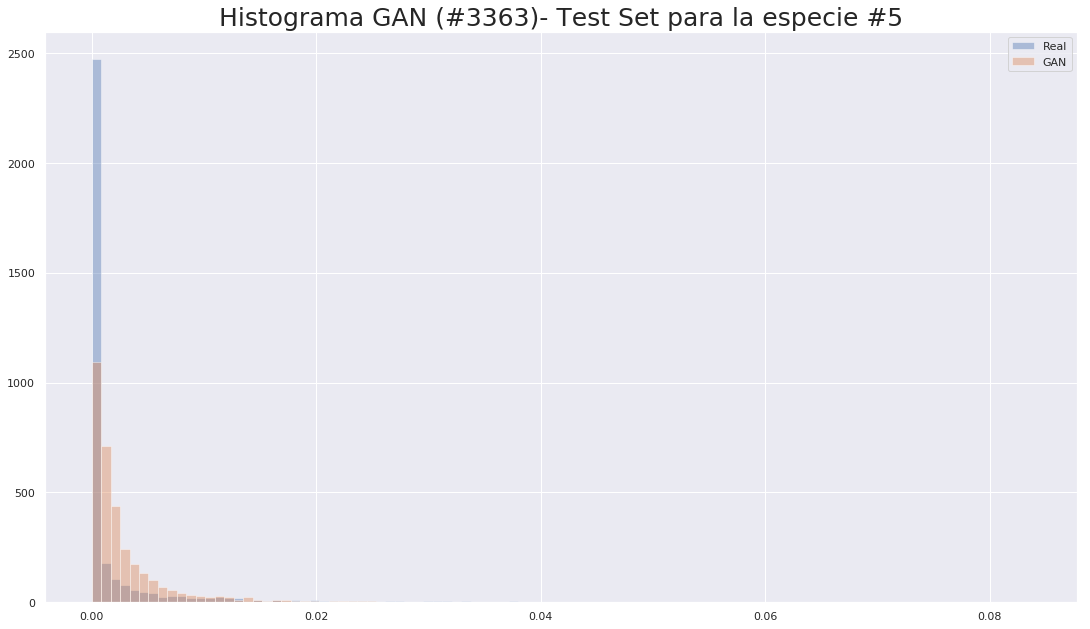

In [5]:
esp = 5

a,b = balance_ds(early_gan_set[:,esp],test_set[:,esp])

print(a.ndim)
print(b.ndim)

plot_abundance_histogram(a,b, esp)


m = str(early_gan_set.shape[0])
plt.title("Histograma GAN (#"+m+")- Test Set para la especie #"+str(esp),fontsize=25)
print("Los datasets del histograma tienen "+str(early_gan_set.shape[0])+" muestras")
print("JSD(GAN, Test Set) = "+str(gan_error(early_gan_set[:,esp],test_set[:,esp], "JSD")))

#plt.xlim(0,0.04)
#plt.ylim(0,1000)

## Histograma GAN (Later)-Test Set

Los datasets del histograma tienen 20000 muestras
JSD(GAN, Test Set) = 0.7245869375866214


(0, 50)

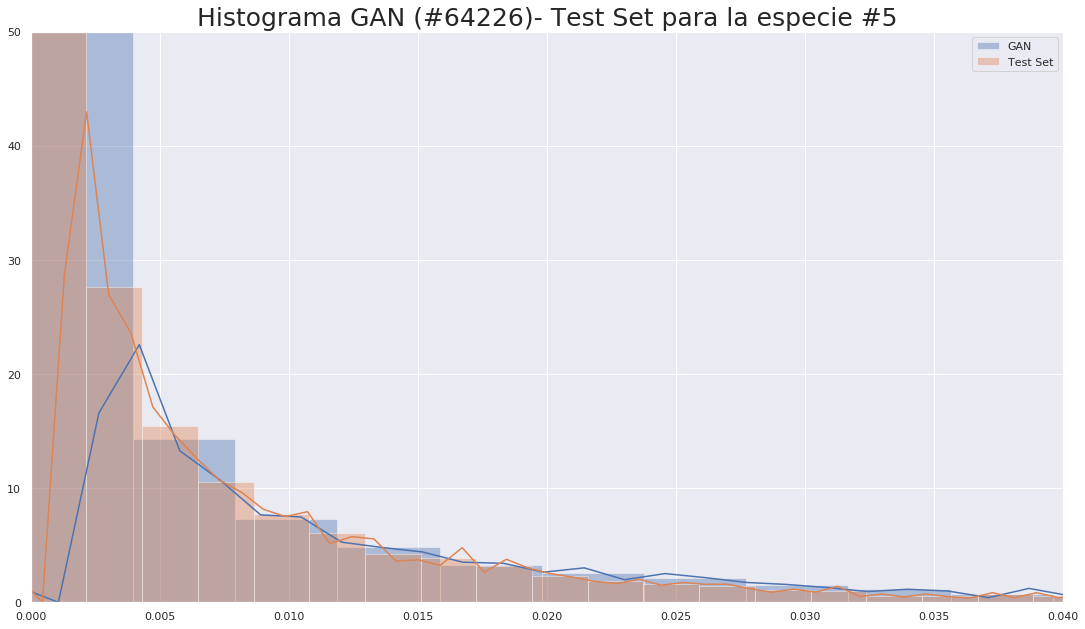

In [6]:
esp = 5

a,b = balance_ds(later_gan_set[:,esp],test_set[:,esp] )

sns.distplot(a, label='GAN')
sns.distplot(b, label ='Test Set')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

m = str(later_gan_set.shape[0])
plt.title("Histograma GAN (#"+m+")- Test Set para la especie #"+str(esp),fontsize=25)
assert a.shape == b.shape
print("Los datasets del histograma tienen "+str(a.shape[0])+" muestras")
print("JSD(GAN, Test Set) = "+str(JSD(a,b)))


plt.xlim(0,0.04)
plt.ylim(0,50)

## Histograma Trainset-Test Set

Los datasets del histograma tienen 20000 muestras
JSD(Train Set, Test Set) = 0.7298855586884624


(0, 50)

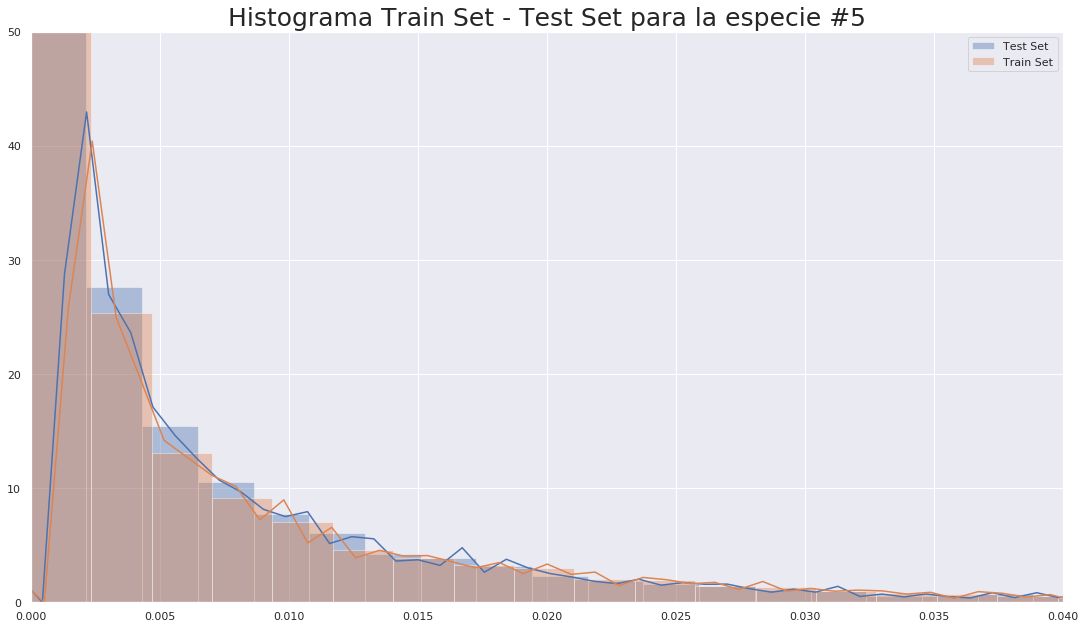

In [7]:
esp = 5


a,b = balance_ds(test_set[:,esp],train_set[:,esp] )

sns.distplot(a, label='Test Set')
sns.distplot(b, label ='Train Set')
plt.legend()


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.title("Histograma Train Set - Test Set para la especie #"+str(esp),fontsize=25)


assert a.shape == b.shape
print("Los datasets del histograma tienen "+str(a.shape[0])+" muestras")
print("JSD(Train Set, Test Set) = "+str(JSD(a,b)))

# lims
plt.xlim(0,0.04)
plt.ylim(0,50)


# Tablas de JSD por subdataset y Graficas

## JSD Score


$$S = e^{\frac{1}{N} \sum_{n=0}^{N}  x}$$
Donde

$$\vec x = {JSD(GAN_k, Testset_k)}$$

In [8]:
deeper_gan_path =  '../data/deeper_gan'
sparse_gan_path =  '../data/sparse_gan'

In [9]:
pre_ribbon_gan_path =  '../data/casi_ribbon'
pre_ribbon_tabla_test = build_table2(pre_ribbon_gan_path, test_set)


Table Building progress 0.0%
Table Building progress 13.51%
Table Building progress 27.03%
Table Building progress 40.54%
Table Building progress 54.05%
Table Building progress 67.57%
Table Building progress 81.08%
Table Building progress 94.59%


In [10]:
original_tabla_test = build_table2(original_gan_path, test_set)
depeer_tabla_test = build_table2(deeper_gan_path, test_set)
sparse_tabla_test = build_table2(sparse_gan_path, test_set)


Table Building progress 0.0%
Table Building progress 10.0%
Table Building progress 20.0%
Table Building progress 30.0%
Table Building progress 40.0%
Table Building progress 50.0%
Table Building progress 60.0%
Table Building progress 70.0%
Table Building progress 80.0%
Table Building progress 90.0%
Table Building progress 0.0%
Table Building progress 10.0%
Table Building progress 20.0%
Table Building progress 30.0%
Table Building progress 40.0%
Table Building progress 50.0%
Table Building progress 60.0%
Table Building progress 70.0%
Table Building progress 80.0%
Table Building progress 90.0%
Table Building progress 0.0%
Table Building progress 10.0%
Table Building progress 20.0%
Table Building progress 30.0%
Table Building progress 40.0%
Table Building progress 50.0%
Table Building progress 60.0%
Table Building progress 70.0%
Table Building progress 80.0%
Table Building progress 90.0%


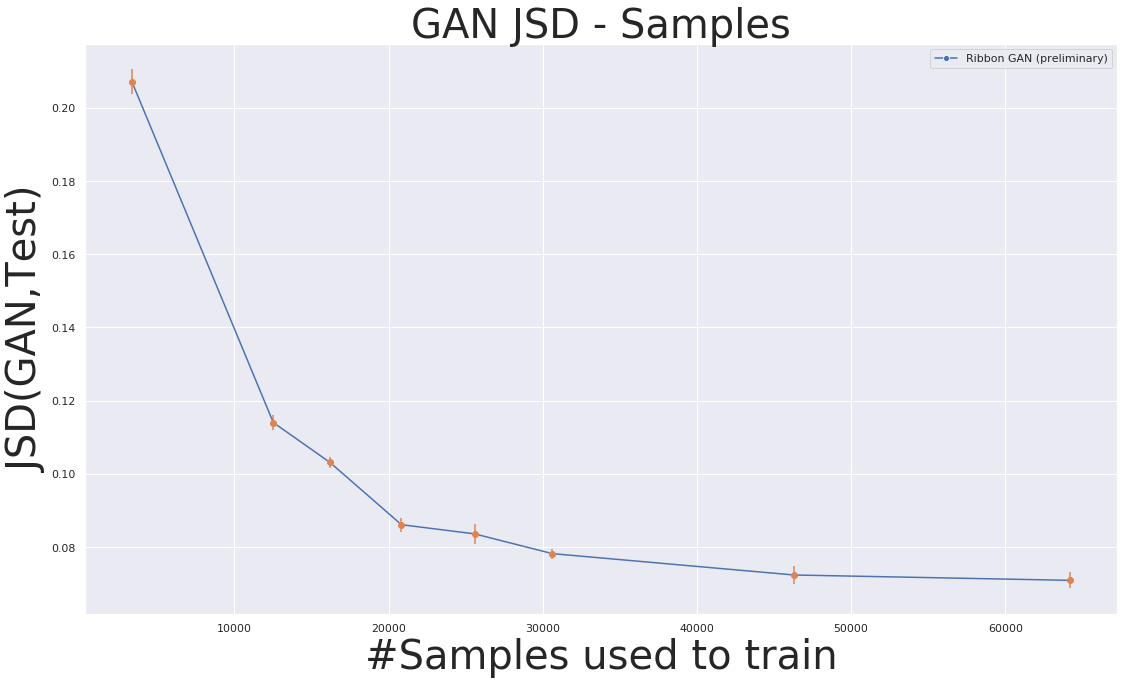

In [11]:
plot_gan_curve(pre_ribbon_tabla_test, "Ribbon GAN (preliminary)")


plt.ylabel("JSD(GAN,Test)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("GAN JSD - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


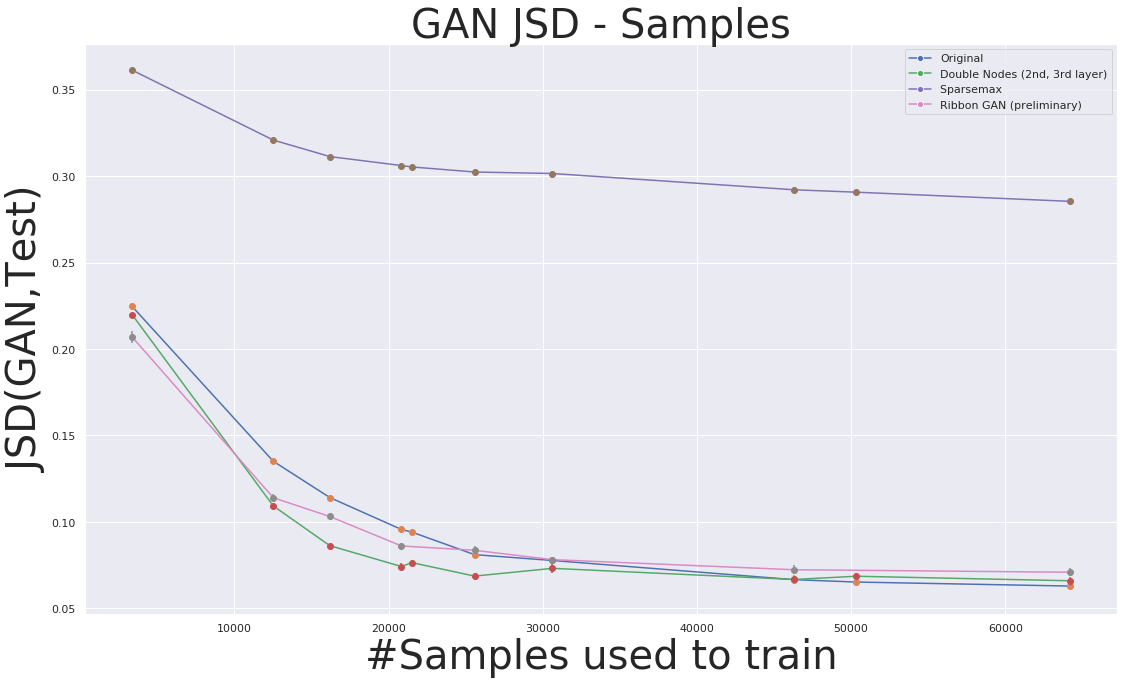

In [13]:
plot_gan_curve(original_tabla_test, "Original")
plot_gan_curve(depeer_tabla_test, "Double Nodes (2nd, 3rd layer)")
plot_gan_curve(sparse_tabla_test, "Sparsemax ")

plot_gan_curve(pre_ribbon_tabla_test, "Ribbon GAN (preliminary)")

plt.ylabel("JSD(GAN,Test)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("GAN JSD - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.savefig("dos.png", dpi=300)

In [ ]:
tabla_train  = build_table(data_path, train_set)


In [ ]:
print(train_set.shape)

In [ ]:
print(test_set.shape)

In [ ]:
plot_gan_curve(tabla_test, debug_flag= True)
plt.ylabel("JSD(GAN,Test)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("JSD(GAN,Test) - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# plt.savefig("curve.png", dpi=300)

In [ ]:
plot_gan_curve(tabla_train, debug_flag=True)
plt.ylabel("JSD(GAN,Training)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("JSD(GAN,Training) - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
